<a href="https://colab.research.google.com/github/Giffy/AI_Intro-to-Machine-Learning/blob/master/Session-5/PCA_Irises_Sklearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Based in: https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python

In [0]:
import numpy as np
import pandas as pd

# Dataset preparation

Loading and analyzing the iris flowers dataset.

In [8]:
iris_dataset = pd.read_csv('https://raw.githubusercontent.com/Giffy/AI_Intro-to-Machine-Learning/master/Session-5/Datasets/iris.data.zip', header=None)
iris_dataset.columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)', 'label']

iris_dataset.tail()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [9]:
iris_dataset.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Principal Component Analysis (step by step)


Start by Standardizing the data since PCA's output is influenced based on the scale of the features of the data.

In [0]:
from sklearn.preprocessing import StandardScaler
features = iris_dataset.columns.to_list()[:4]
x = iris_dataset.loc[:, features].values
x_std = StandardScaler().fit_transform(x) # normalizing the features

Let's check whether the normalized data has a mean of zero and a standard deviation of one.

In [11]:
round(np.mean(x_std),1),np.std(x_std)

(-0.0, 1.0)

Let's convert the normalized features into a tabular format with the help of DataFrame.

In [12]:
feat_cols = ['feature'+str(i) for i in range(x_std.shape[1])]
normalised_iris = pd.DataFrame(x_std,columns=feat_cols)
normalised_iris.tail()

,feature0,feature1,feature2,feature3
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956
149,0.068662,-0.124958,0.762759,0.790591


Now comes the critical part, the next few lines of code will be projecting the thirty-dimensional Iris data to two-dimensional principal components

In [0]:
from sklearn.decomposition import PCA
pca_iris = PCA(n_components=2)
principalComponents_iris = pca_iris.fit_transform(x_std)

 let's create a DataFrame that will have the principal component values for all 569 samples.

In [14]:
principal_iris_df = pd.DataFrame(data = principalComponents_iris
             , columns = ['principal component 1', 'principal component 2'])
principal_iris_df.tail()

,principal component 1,principal component 2
145,1.870522,0.382822
146,1.558492,-0.905314
147,1.520845,0.266795
148,1.376391,1.016362
149,0.959299,-0.022284


In [15]:
print('Explained variation per principal component: {}'.format(pca_iris.explained_variance_ratio_))

Explained variation per principal component: [0.72770452 0.23030523]


<Figure size 432x288 with 0 Axes>

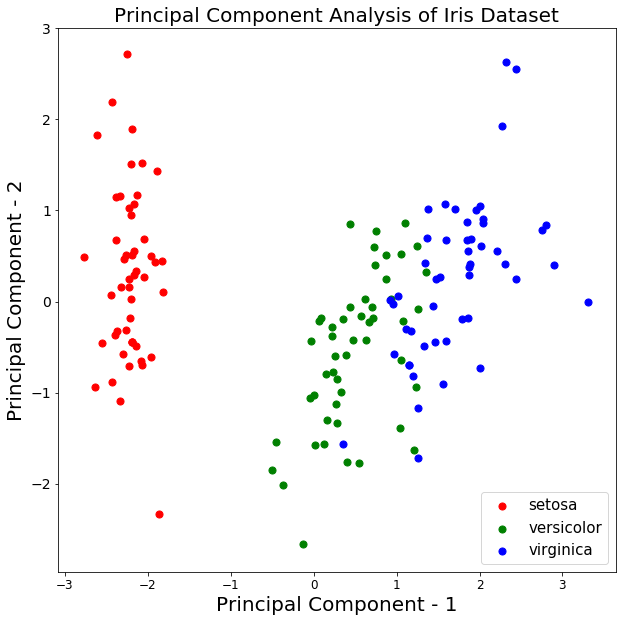

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Iris Dataset",fontsize=20)
targets = iris_dataset['label'].unique()
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = iris_dataset['label'] == target
    plt.scatter(principal_iris_df.loc[indicesToKeep, 'principal component 1']
               , principal_iris_df.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

plt.show()